# Importing Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cm, classification_report as cr
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")

# Part 1: Model Creation

## MNIST Model

Download and split the MNIST dataset into test and training sets.

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

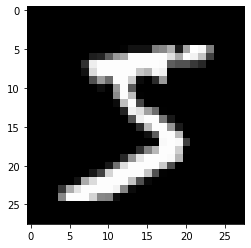

5


In [3]:
plt.imshow(X_train[0], cmap="gray")
plt.show()
print (y_train[0])

In [4]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

Reshaped data from (60000,28,28) to (60000,28,28,1) to be able to use in our model.

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Converted labels to categorical format so that our model can predict these values categorically instead of continuously.

In [6]:
## Declare the model
model = Sequential()

## Declare the layers
layer_1 = Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1))
layer_2 = Conv2D(64, kernel_size=3, activation='relu')
layer_3 = Flatten()
layer_4 = Dense(10, activation='softmax')

## Add the layers to the model
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)

Created the model with 4 layers. The first layer is a simple convolution layer that takes in inputs of shape (28,28,1) with the "1" indicating a greyscale image.

The flatten layer allows us to link the convolution layer to the dense layer to obtain an output

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2)

Epoch 1/2
1875/1875 [==============================] - 199s 106ms/step - loss: 0.4462 - accuracy: 0.9492 - val_loss: 0.1031 - val_accuracy: 0.9687
Epoch 2/2
1875/1875 [==============================] - 190s 102ms/step - loss: 0.0705 - accuracy: 0.9790 - val_loss: 0.1010 - val_accuracy: 0.9702


In [9]:
model.save("digit")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: digit/assets


## Custom Model without Encircled Digits

In [2]:
x = []
y = []

In [3]:
for dir1 in os.listdir('dataset2'):
    if dir1!=".DS_Store":
        for file in os.listdir(os.path.join('dataset2', dir1)):
            image_path= os.path.join('dataset2', dir1,  file)
            image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
            img = 255 - image[:, :, 3]
            x.append(img)
            y.append(int(dir1))

Here, we are appending images into our list 'x' and their corresponding labels into our list 'y'

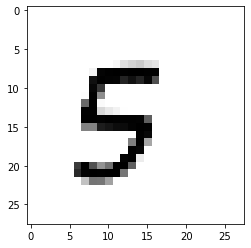

In [13]:
plt.imshow(x[40000], cmap="gray")

In [12]:
x = np.array(x)
y = np.array(y)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15, random_state=101)

We convert the lists into numpy arrays and then perform train-test-split to use in our model.

In [13]:
xtrain = xtrain.reshape(91570,28,28,1)
xtest = xtest.reshape(16160,28,28,1)
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

Before the arrays can be used in our model, we need to reshape them to the order of (size, 28,28,1) to feed our model grayscale images.

In [14]:
## Declare the model
model2 = Sequential()

## Declare the layers
layer_1 = Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28,1))
layer_2 = Conv2D(16, kernel_size=3, activation='relu')
layer_3 = Flatten()
layer_4 = Dense(10, activation='softmax')

## Add the layers to the model
model2.add(layer_1)
model2.add(layer_2)
model2.add(Dropout(0.2))
model2.add(layer_3)
model2.add(layer_4)

The model here is similar to the one used to train the MNIST dataset.

In [15]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model2.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=2)

Epoch 1/2
2862/2862 [==============================] - 261s 91ms/step - loss: 0.5629 - accuracy: 0.9020 - val_loss: 0.0343 - val_accuracy: 0.9916
Epoch 2/2
2862/2862 [==============================] - 265s 92ms/step - loss: 0.0442 - accuracy: 0.9908 - val_loss: 0.0101 - val_accuracy: 0.9973


In [17]:
model2.save("digit2")

INFO:tensorflow:Assets written to: digit2/assets


## Custom Model with Encircled Digits

This model is trained on numbers that are encircled. We perform the same steps as we did with the prrevious model in order to create our datasets and train the model.

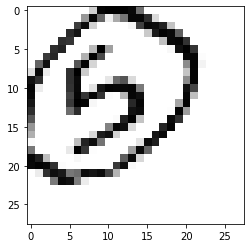

In [23]:
x = []
y = []
image = cv2.imread('circle_dataset/datadown/5/20250.png', cv2.IMREAD_UNCHANGED)
img = 255 - image[:, :, 3]
plt.imshow(image)

In [26]:
for dir1 in os.listdir('circle_dataset/datadown(2)'):
        for file in os.listdir(os.path.join('circle_dataset/datadown', dir1)):
            image_path= os.path.join('circle_dataset/datadown', dir1,  file)
            image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
            img = 255 - image[:, :, 3]
            x.append(img)
            y.append(int(dir1))

In [27]:
x = np.array(x)
y = np.array(y)

In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15, random_state=101)
print(xtrain.shape, xtest.shape)

(74358, 28, 28) (13122, 28, 28)


In [30]:
xtrain = xtrain.reshape(74358,28,28,1)
xtest = xtest.reshape(13122,28,28,1)
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [31]:
## Declare the model
model3 = Sequential()

## Declare the layers
layer_1 = Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28,1))
layer_2 = Conv2D(16, kernel_size=3, activation='relu')
layer_3 = Conv2D(12, kernel_size=3, activation ='relu')
layer_4 = Flatten()
layer_5 = Dense(10, activation='softmax')

## Add the layers to the model
model3.add(layer_1)
model3.add(layer_2)
model3.add(Dropout(0.2))
model3.add(layer_3)
model3.add(Dropout(0.2))
model3.add(layer_4)
model3.add(layer_5)

In [32]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
model3.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=2)

Epoch 1/2
2324/2324 [==============================] - 268s 115ms/step - loss: 0.7216 - accuracy: 0.8899 - val_loss: 0.0032 - val_accuracy: 0.9989
Epoch 2/2
2324/2324 [==============================] - 254s 109ms/step - loss: 0.0229 - accuracy: 0.9935 - val_loss: 0.0114 - val_accuracy: 0.9967


In [34]:
model3.save("digit3")

INFO:tensorflow:Assets written to: digit3/assets


# Part 2: Extracting Red Entities from the Image

First, we will read the image to be scanned.

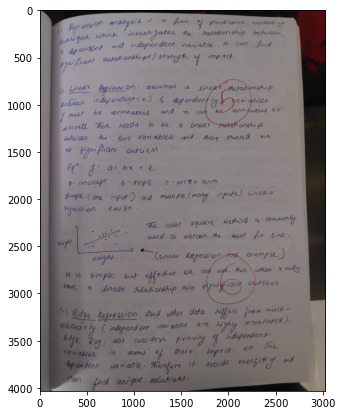

In [14]:
original_img = cv2.imread('0003.jpg')
img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,7))
plt.imshow(img)

Next, we will apply a red threshold filter on the image, to scan for pixels in a given rgb range.

In [15]:
t = 35 #threshold acceptance
red_thresh = cv2.inRange(img, np.array([123 - t, 57 - t, 57 - t]), np.array([220 + t, 57 + t, 57 + t]))

Finally, we will create a mask over the original image, to bring out only the pixels in the previously defined RGB range.

In [16]:
combined_mask = red_thresh
combined_mask_inv = 255 - combined_mask

In [17]:
combined_mask_rgb = cv2.cvtColor(combined_mask_inv, cv2.COLOR_GRAY2RGB)
img = cv2.max(img, combined_mask_rgb)

In order to pass grayscale images through our model, we will convert the masked image to a grayscaled version of itself.

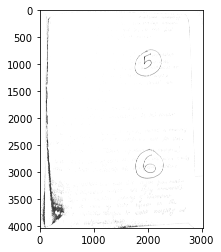

In [18]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
plt.imshow(img, cmap="gray")

# Part 3: Extracting Circles from the Image

Once the image has been red-filtered, we need to extract the circular entities from the image. We do this as an additional step, incase the red-filtering produces inconsistencies in the image, such as bringing out random lines that are not red, or part of the numbers we require. 

For this, we will be using Hough Circle Transform to identify circles in the image.

In [19]:
#Mask to crop circles
height,width = img.shape
mask = np.zeros((height,width), np.uint8)

In [20]:
#Applying Hough Circle Transform
img = cv2.medianBlur(img,5)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,200,param1=100,param2=30,minRadius=120,maxRadius=250)

In [21]:
# To Idenitify Circles in the Image
for i in circles[0,:]:
    i[2]=i[2]+4
    # Draw on mask
    cv2.circle(mask,(i[0],i[1]),int(i[2]),(255,255,255),thickness=-1)

In [22]:
#to show masked images
masked_data = cv2.bitwise_and(img, img, mask=mask)

# Apply Threshold
_,thresh = cv2.threshold(mask,1,255,cv2.THRESH_BINARY)

# Find Contour
contours = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
crop = []
j = 0
for i in contours[0]:
    x,y,w,h = cv2.boundingRect(i)
    

# Crop masked_data
    crop.append(masked_data[y:y+h,x:x+w])

#Code to close Window
    cv2.imshow('Cropped Eye',crop[j])
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    j+=1

Here, we can also see that applying Hough Transform causes the detection of non-circular objects at times. However, these objects are rarely equal in both height and width, and thus, this can be used as a way of distingusihing images with and without circled numbers.

# Part 4: Digit Recognition

First we will load our digit recognition models.

In [95]:
model1 = keras.models.load_model("digit")
model2 = keras.models.load_model("digit2")
model3 = keras.models.load_model("digit3")

In [98]:
grey = crop[1]
image = grey
size = len(grey)
for i in range(size):
    for j in range(size):
        if (grey[i][j]==0):
            grey[i][j] = 255

Here, we have simply converted the black pixels outside the cropped circle images to white pixels, as to clean up our image before passing it through the model.

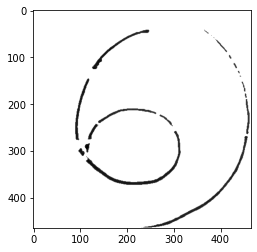




----------------Contoured Image--------------------


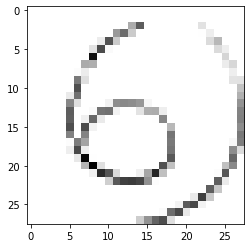

In [99]:
preprocessed_digits = []
plt.imshow(grey, cmap="gray")
plt.show()
resized_digit=cv2.equalizeHist(grey)
# Resizing that digit to (18, 18)
resized_digit =  imutils.resize(resized_digit, width=28, height=28)

# Adding the preprocessed digit to the list of preprocessed digits
preprocessed_digits.append(resized_digit)
    
print("\n\n\n----------------Contoured Image--------------------")
np.set_printoptions(threshold=np.inf)
plt.imshow(resized_digit, cmap="gray")
inp = np.array(preprocessed_digits)

We have resized the original cropped image to a 28x28 size image, in order for us to be able to pass it through our model.

### Model 1



---------------------------------------


=========PREDICTION============ 




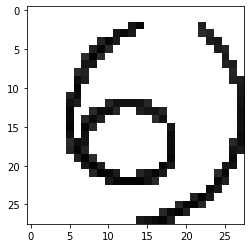



Final Output: 6

Prediction (Softmax) from the neural network:

 [[1.6190547e-02 1.2721592e-06 1.4404309e-04 3.0059405e-04 9.6848281e-03
  1.6645813e-01 7.7948207e-01 4.9597948e-05 2.6097750e-02 1.5912225e-03]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


---------------------------------------




In [100]:
for digit in preprocessed_digits:
    digit2=cv2.equalizeHist(digit)
    #digit2 = digit
    prediction = model1.predict(digit2.reshape(1, 28, 28, 1))

    print ("\n\n---------------------------------------\n\n")
    print ("=========PREDICTION============ \n\n")
    plt.imshow(digit2.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\nFinal Output: {}".format(np.argmax(prediction)))

    
    print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))

    
    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 1
    print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
    print ("\n\n---------------------------------------\n\n")

### Model 2



---------------------------------------


=========PREDICTION============ 




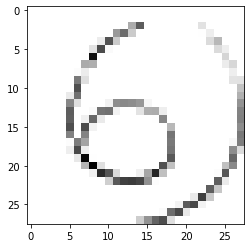



Final Output: 0

Prediction (Softmax) from the neural network:

 [[0.24160798 0.21271734 0.0723645  0.11439162 0.03695168 0.07204394
  0.10686465 0.03902509 0.08457685 0.01945628]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




In [105]:
for digit in preprocessed_digits:
    #digit2=cv2.equalizeHist(digit)
    digit2 = digit
    prediction = model2.predict(digit2.reshape(1, 28, 28, 1))

    print ("\n\n---------------------------------------\n\n")
    print ("=========PREDICTION============ \n\n")
    plt.imshow(digit2.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\nFinal Output: {}".format(np.argmax(prediction)))

    
    print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))

    
    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 1
    print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
    print ("\n\n---------------------------------------\n\n")

### Model 3



---------------------------------------


=========PREDICTION============ 




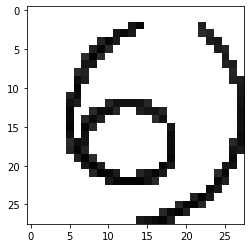



Final Output: 5

Prediction (Softmax) from the neural network:

 [[1.0749969e-04 8.2470510e-09 6.4078820e-05 4.5867577e-11 5.3301639e-09
  9.8728406e-01 4.4985742e-07 1.2543932e-02 1.1959494e-08 2.1091030e-11]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


---------------------------------------




In [103]:
for digit in preprocessed_digits:
    digit2=cv2.equalizeHist(digit)
    #digit2 = digit
    prediction = model3.predict(digit2.reshape(1, 28, 28, 1))

    print ("\n\n---------------------------------------\n\n")
    print ("=========PREDICTION============ \n\n")
    plt.imshow(digit2.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\nFinal Output: {}".format(np.argmax(prediction)))

    
    print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))

    
    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 1
    print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
    print ("\n\n---------------------------------------\n\n")